In [ ]:
"""
This notebook merges data from all languages translated to english 
with the original train dataset for SemEval news article similarity task

task website: 
https://competitions.codalab.org/competitions/33835#learn_the_details-timetable
"""

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
rawTranslated = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/allTrainDataTranslated.tsv", sep="\t")

In [3]:
len(rawTranslated)

4950

In [4]:
trainData = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/allTrainData.tsv", sep="\t")

In [5]:
trainData.columns

Index(['Unnamed: 0', 'url1_lang', 'url2_lang', 'pair_id', 'link1', 'link2',
       'ia_link1', 'ia_link2', 'Geography', 'Entities', 'Time', 'Narrative',
       'Overall', 'Style', 'Tone', 'id1', 'id2', 'text1', 'title1', 'text2',
       'title2'],
      dtype='object')

In [6]:
rawTranslated = rawTranslated.drop(columns=["title1", "title2", "text1", "text2"]).rename(columns={"text1En":"text1", "title1En":"title1", "text2En":"text2", "title2En":"title2"})

In [7]:
trainData.columns

Index(['Unnamed: 0', 'url1_lang', 'url2_lang', 'pair_id', 'link1', 'link2',
       'ia_link1', 'ia_link2', 'Geography', 'Entities', 'Time', 'Narrative',
       'Overall', 'Style', 'Tone', 'id1', 'id2', 'text1', 'title1', 'text2',
       'title2'],
      dtype='object')

In [8]:
#checking that concat with different column orderings doesn't 
#mess anything up 
d1 = pd.DataFrame({"a":[1, 2, 3], "b":[2, 4, 6]})
d2 = pd.DataFrame({"b":[9, 8, 5], "a":[3, 7, 9]})
pd.concat([d1, d2])

,a,b
0,1,2
1,2,4
2,3,6
0,3,9
1,7,8
2,9,5


In [9]:
#now we want to concat original en-en pairs with translated data

#en-en pairs from original data 
trainEn = trainData[(trainData["url1_lang"] == "en") & (trainData["url2_lang"] == "en")]

#non en-en pairs from translated data
translated = rawTranslated[(rawTranslated["url1_lang"] != "en") | (rawTranslated["url2_lang"] != "en")]

mergedData = pd.concat([trainEn, translated])

(0, 7000)

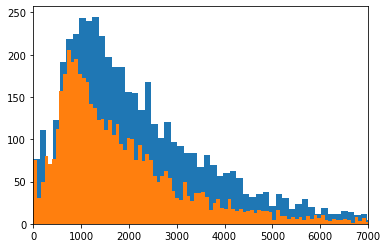

In [13]:
#sanity check concerning article length 
plt.hist([len(str(item)) for item in mergedData["text1"]], bins=400)
plt.xlim([0, 7000])

plt.hist([len(str(item)) for item in mergedData["text2"]], bins=400)
plt.xlim([0, 7000])

clean things up a bit 

In [14]:
#replace values that didn't translate properly 
mergedData[["text1", "title1", "text2", "title2"]] = mergedData[["text1", "title1", "text2", "title2"]].replace("#VALUE!", "").fillna("")

#generate a column that will show us if we have any text attached to an article 
mergedData["titleText1"] = mergedData["title1"] + mergedData["text1"]
mergedData["titleText2"] = mergedData["title2"] + mergedData["text2"]

In [16]:
def numToks(inStr): 
    return len(inStr.split())

#sanity check: should be zero 
#len(mergedData) - len(mergedData[(mergedData["titleText1"].apply(len) > 0) & (mergedData["titleText2"].apply(len) > 0)]) 

0

In [17]:
#keep only the data that were 
cleanedTranslated = mergedData[(mergedData["titleText1"].apply(len) > 0) & (mergedData["titleText2"].apply(len) > 0)]
len(cleanedTranslated)

4950

checking language distribution mostly out of curiousity 

In [21]:
cleanedTranslated[["url1_lang", "url2_lang"]].value_counts()

url1_lang  url2_lang
en         en           1791
de         de            857
           en            576
es         es            567
tr         tr            464
pl         pl            349
ar         ar            274
fr         fr             72
dtype: int64

In [ ]:
#write cleaned version of file 

In [22]:
cleanedTranslated.to_csv("/shared/3/projects/newsDiffusion/data/processed/translatedCleaned.tsv", sep="\t")